In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/bank-additional-full.csv', delimiter =';')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# DATA PREPROCESSING (CHECK NULL, DUPLICATES, MISSING DATA,...)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
#df.replace(['unknown'],np.nan,inplace=True)
#percent_missing = df.isnull().sum() * 100 / len(df)
#percent_missing

In [7]:
df.duplicated().sum()

12

In [8]:
df.duplicated

<bound method DataFrame.duplicated of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         cont

In [9]:
#remove duplicate
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [12]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
df['y'].replace(['no','yes'],[0,1],inplace=True)

In [14]:
#Drop Duration columns
df.drop(['duration'],axis=1,inplace=True)

In [15]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.030381
campaign,0.004622,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129,-0.066361
pdays,-0.034381,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659,-0.324948
previous,0.024379,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411,0.230202
emp.var.rate,-0.000242,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949,-0.298289
cons.price.idx,0.001009,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945,-0.136134
cons.conf.idx,0.129075,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679,0.054802
euribor3m,0.010852,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146,-0.307740
nr.employed,-0.017607,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000,-0.354669
y,0.030381,-0.066361,-0.324948,0.230202,-0.298289,-0.136134,0.054802,-0.307740,-0.354669,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null 

In [17]:
#df.to_csv(r'C:\Users\Bobby\Desktop\bank-addition-full-update.csv', index=False, header=True)

# EDA

**BANK CLIENT DATA**

In [18]:
#Dữ liệu về khách hàng bao gồm các cột:
#Age, Job, Marital, Education, Default, Housing, Loan
df_client=df.iloc[:,0:7]
df_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


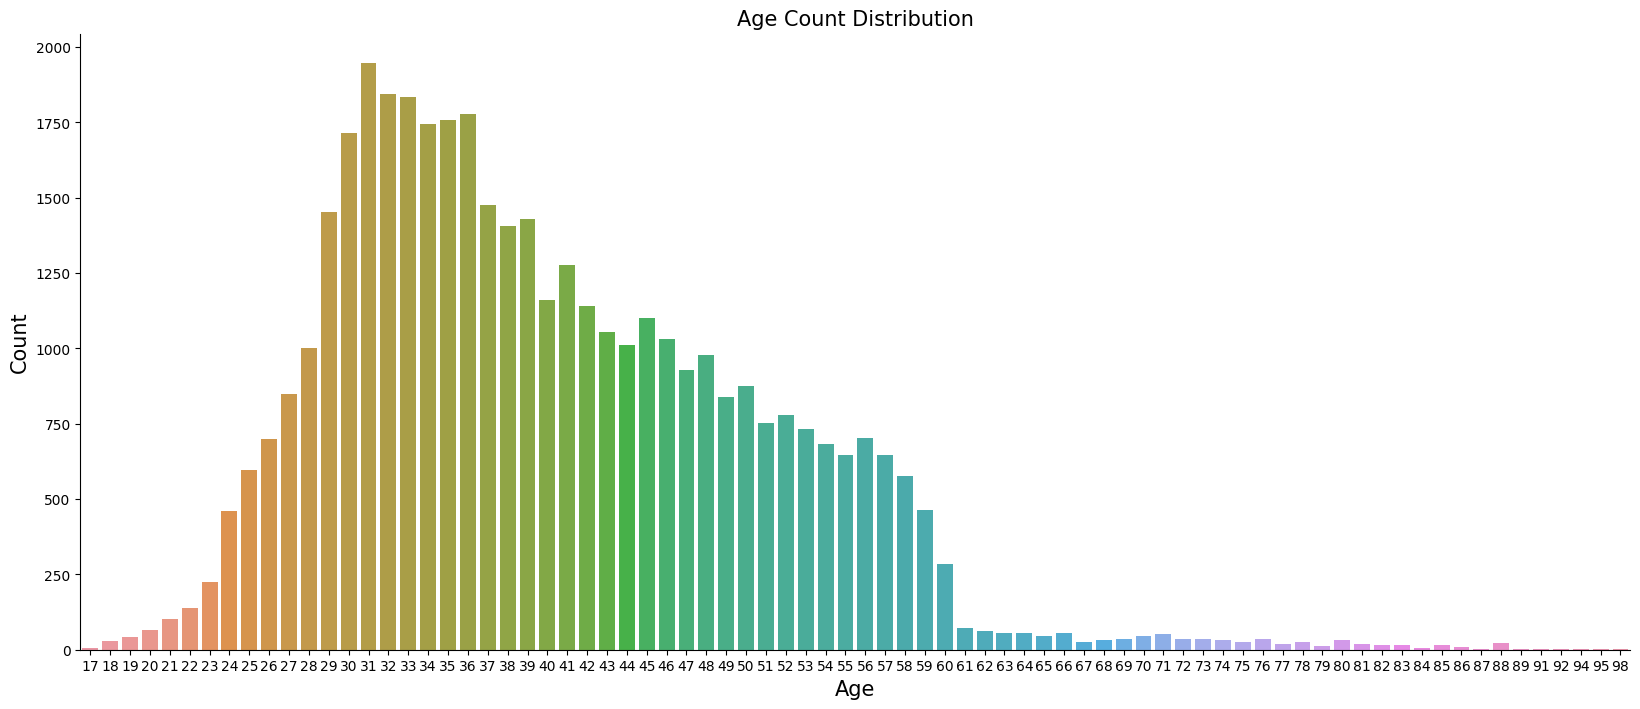

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

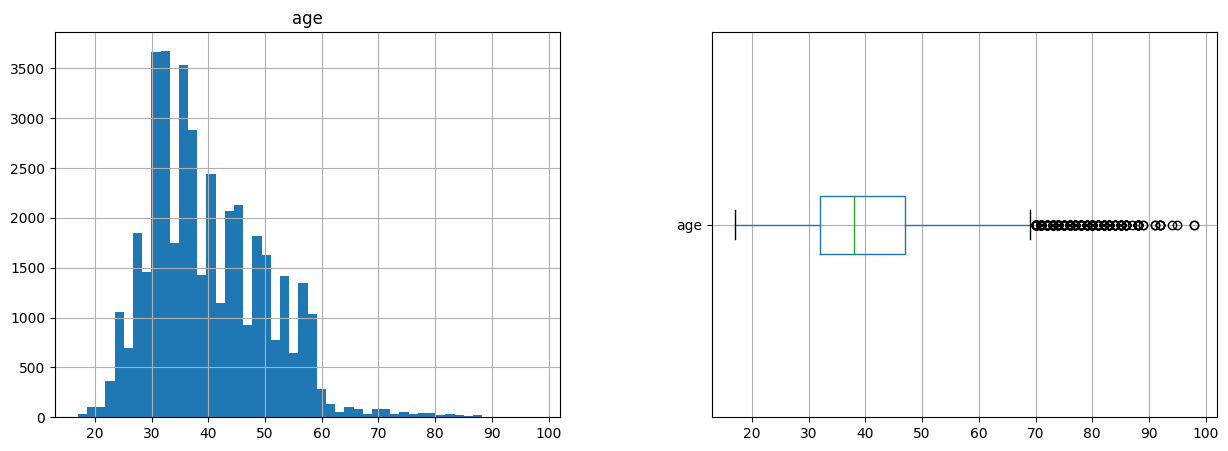

In [20]:
#Find Outliers
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df_client[['age']].hist(bins=50, ax=axes[0]);
df_client[['age']].boxplot(ax=axes[1], vert=False);

In [21]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

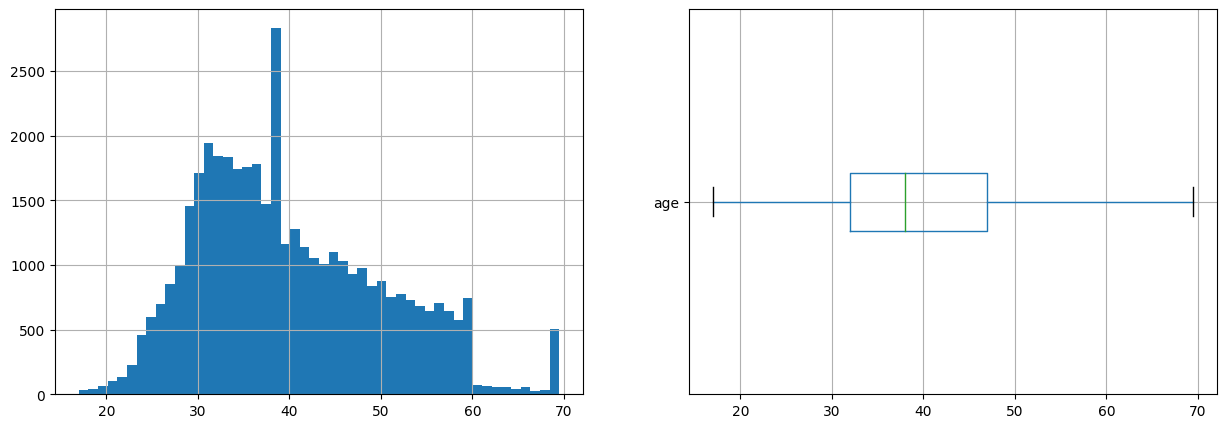

In [22]:
clipped_age = BoxplotOutlierClipper().fit_transform(df["age"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_age.hist(bins=50, ax=axes[0])
clipped_age.to_frame().boxplot(ax=axes[1], vert=False);

In [23]:
clipped_age

0        56.0
1        57.0
2        37.0
3        40.0
4        56.0
         ... 
41183    69.5
41184    46.0
41185    56.0
41186    44.0
41187    69.5
Name: age, Length: 41176, dtype: float64

In [24]:
df_client_clippled=df.iloc[:,0:7]

In [25]:
#data without outliers
df_client_clippled['age']=clipped_age
df_client_clippled

,age,job,marital,education,default,housing,loan
0,56.0,housemaid,married,basic.4y,no,no,no
1,57.0,services,married,high.school,unknown,no,no
2,37.0,services,married,high.school,no,yes,no
3,40.0,admin.,married,basic.6y,no,no,no
4,56.0,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,69.5,retired,married,professional.course,no,yes,no
41184,46.0,blue-collar,married,professional.course,no,no,no
41185,56.0,retired,married,university.degree,no,yes,no
41186,44.0,technician,married,professional.course,no,no,no


In [26]:
#data with outliers
df_client

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


<Axes: xlabel='education', ylabel='count'>

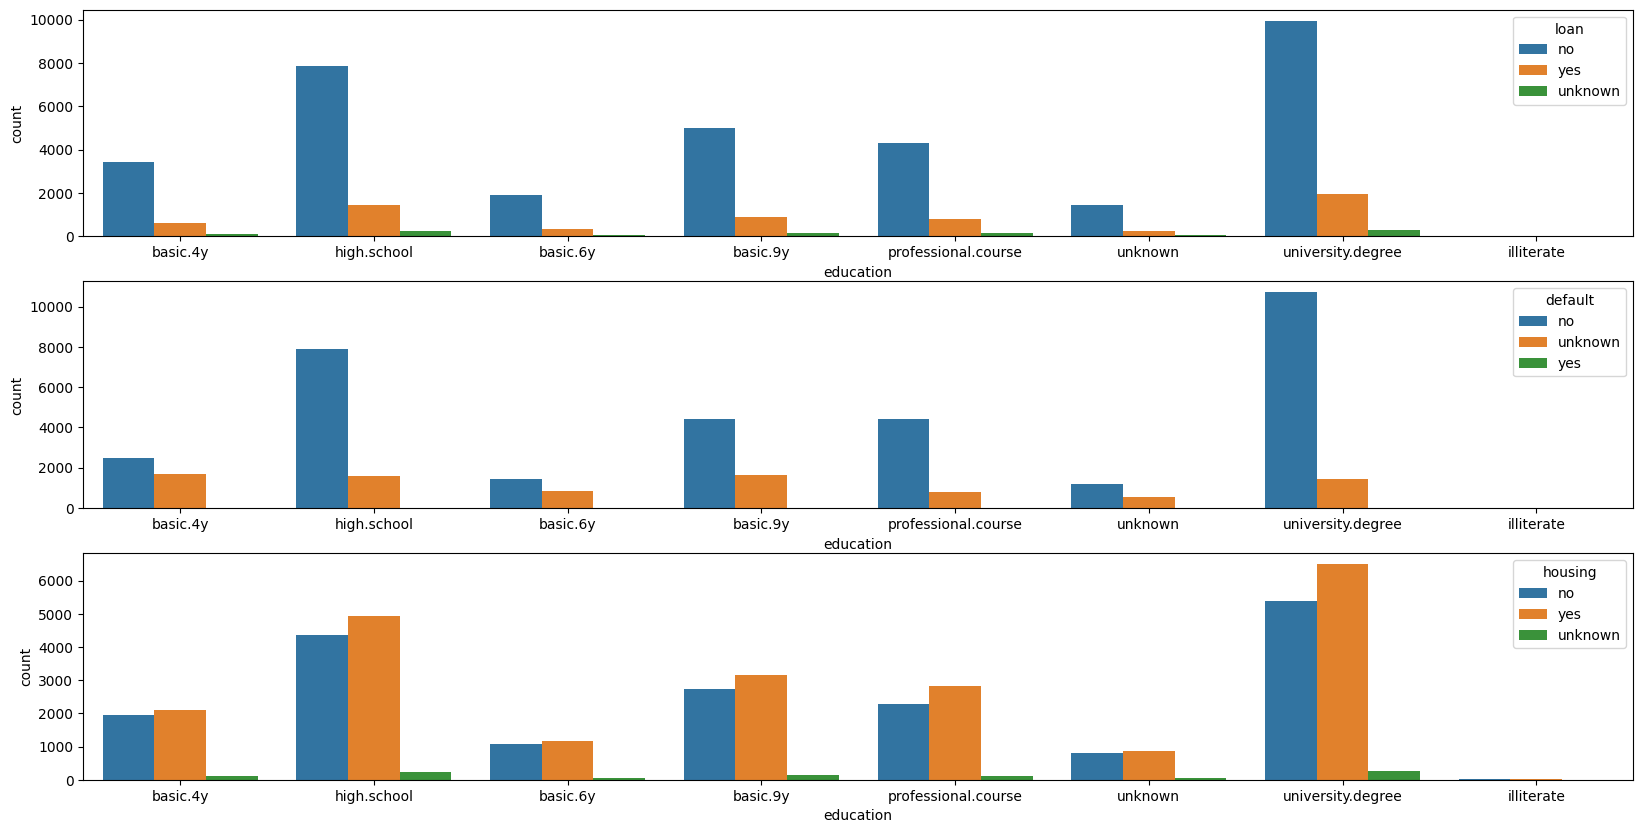

In [27]:
#Education
fig, ax = plt.subplots(3,1,figsize=(20,10))
sns.countplot(ax=ax[0], data=df_client, x='education', hue='loan')
sns.countplot(ax=ax[1], data=df_client, x='education', hue='default')
sns.countplot(ax=ax[2], data=df_client, x='education', hue='housing')

=> Đối chiếu giữa Education và loan, housing, default không có sự tương quan (dù cho ở mọi cấp độ giáo dục thì vẫn có người có nợ hoặc không có nợ)

<Axes: xlabel='job', ylabel='count'>

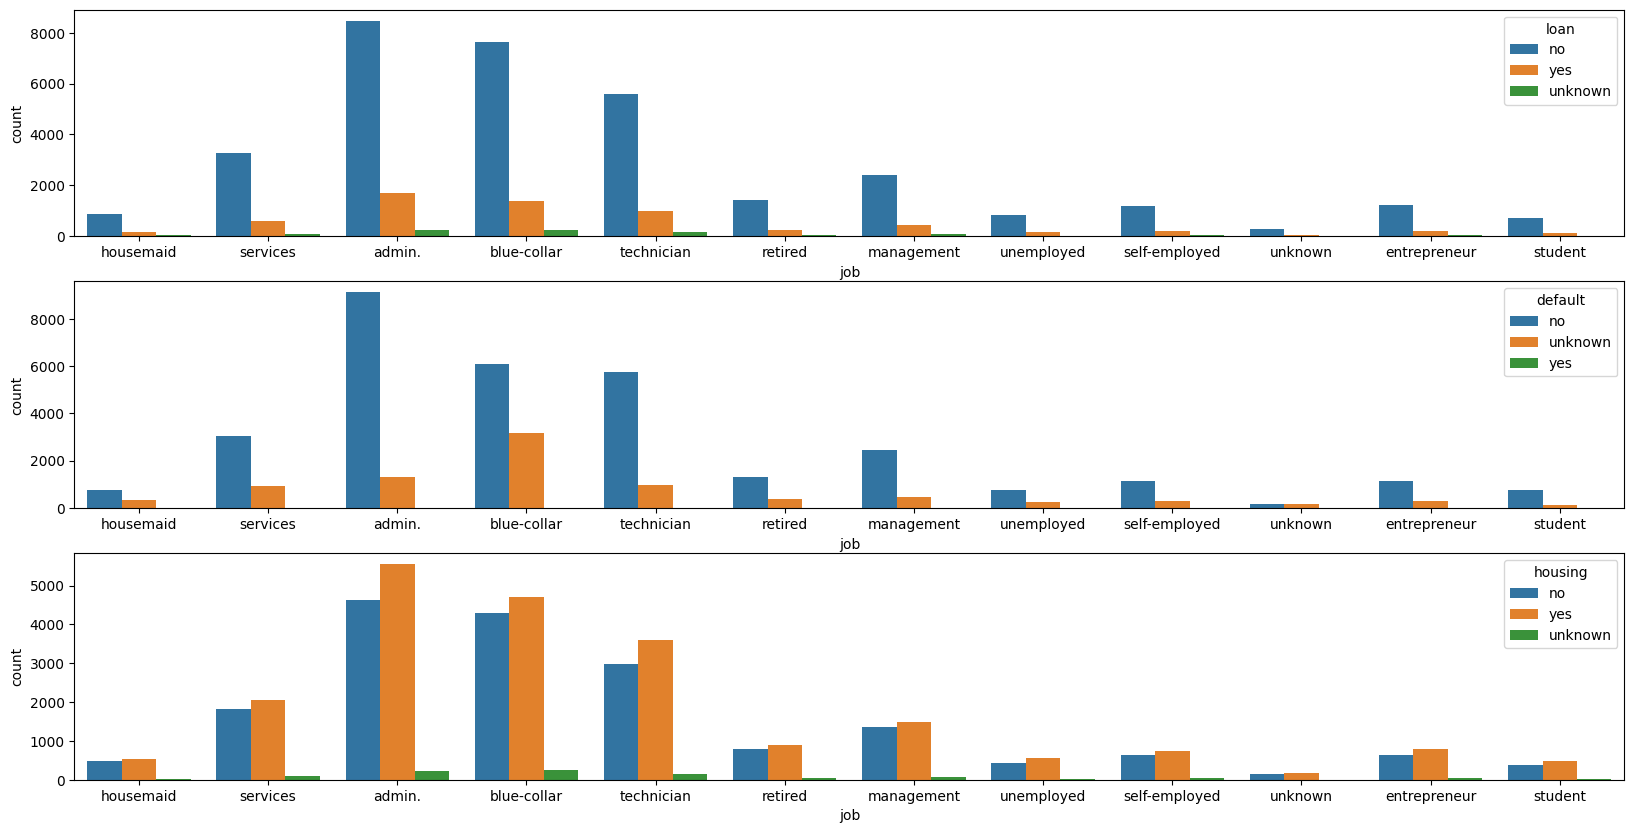

In [28]:
#Jobs
fig, ax = plt.subplots(3,1,figsize=(20,10))
sns.countplot(ax=ax[0], data=df_client, x='job', hue='loan')
sns.countplot(ax=ax[1], data=df_client, x='job', hue='default')
sns.countplot(ax=ax[2], data=df_client, x='job', hue='housing')

=> Tương tự

<Axes: xlabel='marital', ylabel='count'>

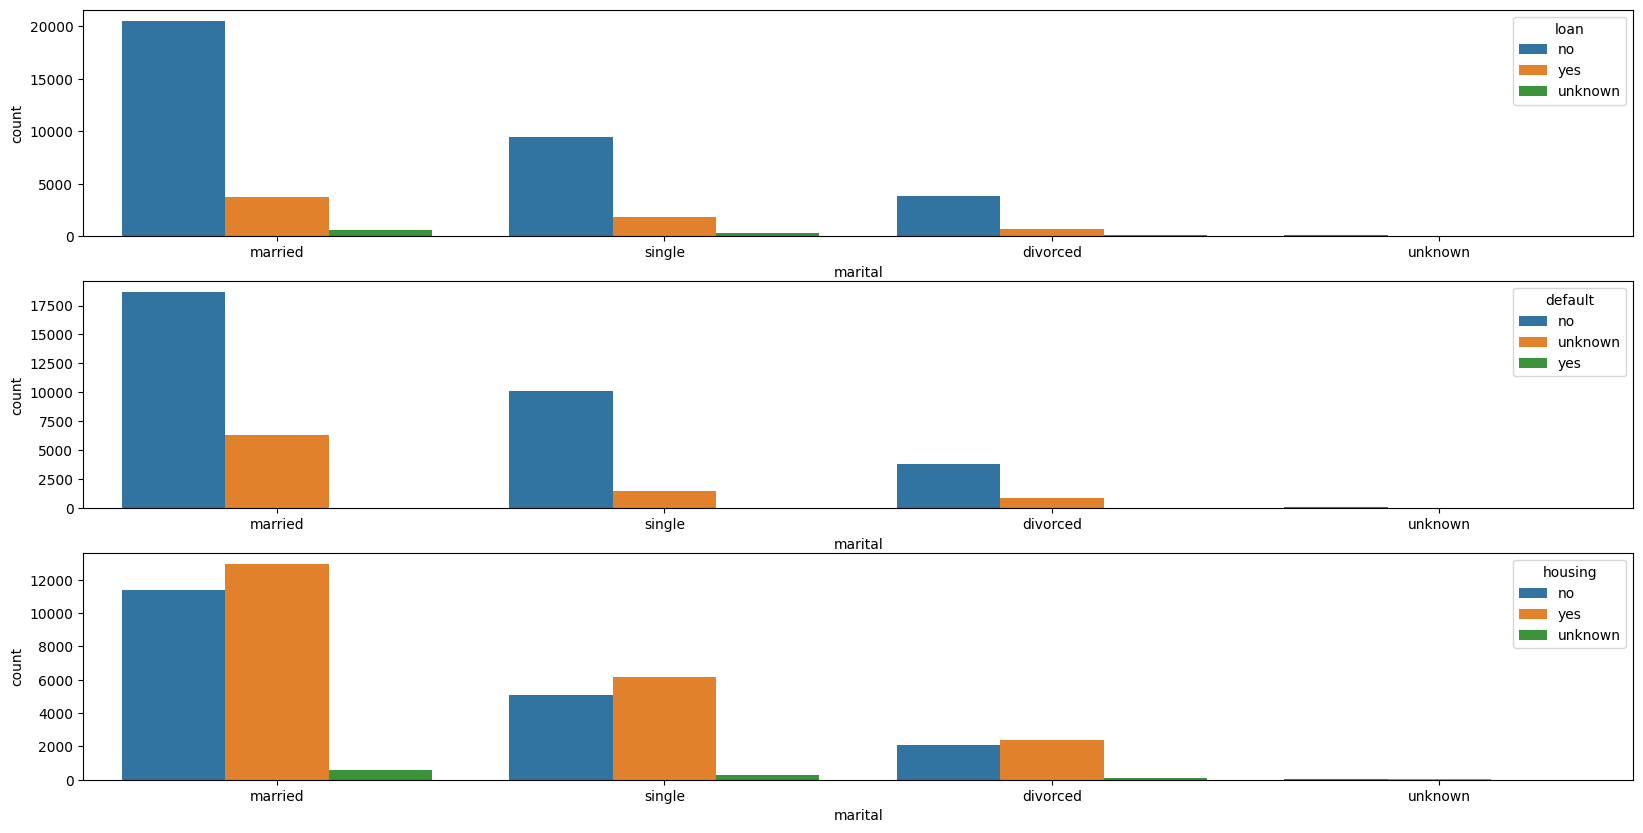

In [29]:
#Marital
fig, ax = plt.subplots(3,1,figsize=(20,10))
sns.countplot(ax=ax[0], data=df_client, x='marital', hue='loan')
sns.countplot(ax=ax[1], data=df_client, x='marital', hue='default')
sns.countplot(ax=ax[2], data=df_client, x='marital', hue='housing')

=> Same

In [30]:
#Get dummies for Jobs, Marital, Education, Housing, Loan and Default
df_client = pd.get_dummies(data = df_client, columns = ['job'] , prefix = ['job'] , drop_first = True)

df_client = pd.get_dummies(data = df_client, columns = ['marital'] , prefix = ['marital'] , drop_first = True)

df_client = pd.get_dummies(data = df_client, columns = ['education'], prefix = ['education'], drop_first = True)

df_client = pd.get_dummies(data = df_client, columns = ['default'] , prefix = ['default'] , drop_first = True)

df_client = pd.get_dummies(data = df_client, columns = ['housing'] , prefix = ['housing'] , drop_first = True)

df_client = pd.get_dummies(data = df_client, columns = ['loan'] , prefix = ['loan'] , drop_first = True)

In [31]:
df_client

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
0,56,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,37,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41184,46,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
41185,56,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
41186,44,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


**BANK RELATED DATA**

In [32]:
df_related = df.iloc[: , 7:10]
df_related.head()

,contact,month,day_of_week
0,telephone,may,mon
1,telephone,may,mon
2,telephone,may,mon
3,telephone,may,mon
4,telephone,may,mon


In [33]:
df_related.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   contact      41176 non-null  object
 1   month        41176 non-null  object
 2   day_of_week  41176 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [34]:
df_related['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [35]:
df_related['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [36]:
df_related['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

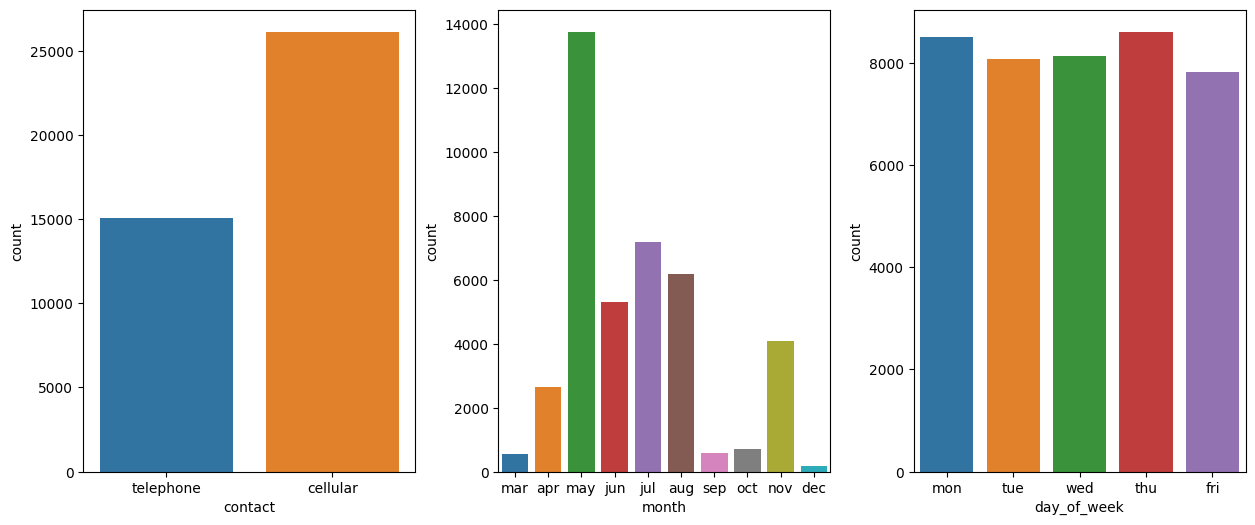

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(data=df_related, x='contact', ax = ax[0])

sns.countplot(data=df_related, x='month', ax = ax[1], order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

sns.countplot(data=df_related, x='day_of_week', ax = ax[2])
plt.subplots_adjust(wspace=0.25)

In [38]:
#Get dummies these variables
df_related = pd.get_dummies(data = df_related, prefix = ['contact'] , columns = ['contact'] , drop_first = True)

df_related = pd.get_dummies(data = df_related, prefix = ['month'] , columns = ['month'] , drop_first = True)

df_related = pd.get_dummies(data = df_related, prefix = ['day_of_week'], columns = ['day_of_week'], drop_first = True)

In [39]:
df_related

,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,0,0,1,0,0,0,0,0,0
41184,0,0,0,0,0,0,0,1,0,0,0,0,0,0
41185,0,0,0,0,0,0,0,1,0,0,0,0,0,0
41186,0,0,0,0,0,0,0,1,0,0,0,0,0,0


**BANK OTHERS DATA**

In [40]:
df_other = df.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
df_other.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [41]:
df_other['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [42]:
df_other = pd.get_dummies(data = df_other, prefix = ['poutcome'], columns = ['poutcome'], drop_first = True)

In [43]:
df_other

,campaign,pdays,previous,poutcome_nonexistent,poutcome_success
0,1,999,0,1,0
1,1,999,0,1,0
2,1,999,0,1,0
3,1,999,0,1,0
4,1,999,0,1,0
...,...,...,...,...,...
41183,1,999,0,1,0
41184,1,999,0,1,0
41185,2,999,0,1,0
41186,1,999,0,1,0


**SOCIAL AND ECONOMIC DATA**

In [44]:
df_se = df.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
df_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


# FEATURE SCALING

In [45]:
#Merge 4 dataset
df_final = pd.concat([df_client, df_related, df_se, df_other], axis = 1)
df_final

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome_nonexistent,poutcome_success
0,56,0,0,1,0,0,0,0,0,0,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
1,57,0,0,0,0,0,0,1,0,0,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
2,37,0,0,0,0,0,0,1,0,0,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
3,40,0,0,0,0,0,0,0,0,0,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
4,56,0,0,0,0,0,0,1,0,0,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,0,0,0,1,0,0,0,0,...,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1,0
41184,46,1,0,0,0,0,0,0,0,0,...,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1,0
41185,56,0,0,0,0,1,0,0,0,0,...,-1.1,94.767,-50.8,1.028,4963.6,2,999,0,1,0
41186,44,0,0,0,0,0,0,0,0,1,...,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1,0


In [46]:
X =df_final
y =df['y']

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled =scaler.fit_transform(X)

# SPLIT TRAIN/TEST 

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [74]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(df_final, y, test_size = 0.2, random_state = 101)

# MODEL

**LOGISTIC REGRESSION**

In [50]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [85]:
LOGCV = (cross_val_score(logreg, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
logregpred = logreg.predict(X_test)
print(confusion_matrix(y_test, logregpred))
print(round(accuracy_score(y_test, logregpred),2)*100)

[[7157  101]
 [ 739  239]]
90.0


**K-NEAREST NEIGHBORS (KNN)**

k=1 84.75 (+/- 0.46)
k=2 89.03 (+/- 0.52)
k=3 88.22 (+/- 0.43)
k=4 89.25 (+/- 0.55)
k=5 88.99 (+/- 0.49)
k=6 89.35 (+/- 0.55)
k=7 89.21 (+/- 0.52)
k=8 89.47 (+/- 0.55)
k=9 89.39 (+/- 0.46)
k=10 89.57 (+/- 0.54)
k=11 89.54 (+/- 0.52)
k=12 89.72 (+/- 0.52)
k=13 89.65 (+/- 0.58)
k=14 89.74 (+/- 0.57)
k=15 89.63 (+/- 0.56)
k=16 89.69 (+/- 0.50)
k=17 89.61 (+/- 0.55)
k=18 89.76 (+/- 0.47)
k=19 89.66 (+/- 0.51)
k=20 89.77 (+/- 0.46)
k=21 89.74 (+/- 0.53)
k=22 89.80 (+/- 0.51)
k=23 89.74 (+/- 0.54)
k=24 89.82 (+/- 0.54)
k=25 89.75 (+/- 0.55)
The optimal number of neighbors is 23 with 89.8%


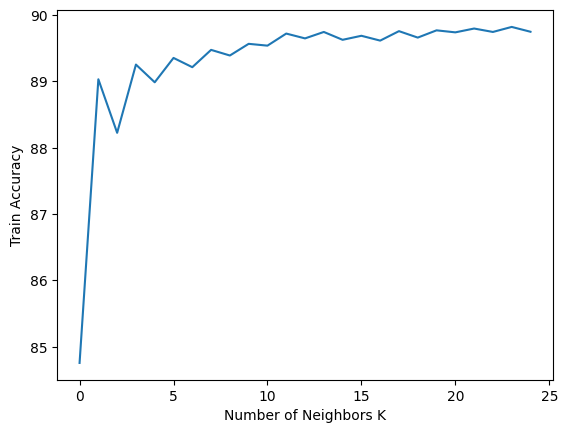

In [52]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [75]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7169   89]
 [ 767  211]]
90.0


**SVM**

In [54]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6764  494]
 [ 702  276]]
85.0


**DECISION TREE**

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6611  647]
 [ 659  319]]
84.0


**RANDOM FOREST**

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7046  212]
 [ 693  285]]
89.0


**XGBOOST**

In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[7083  175]
 [ 699  279]]
89.0


**GRADIENT BOOSTING**

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7152  106]
 [ 715  263]]
90.0


In [59]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
6,Gradient Boosting,0.901245
4,Logistic Model,0.900850
3,K-Near Neighbors,0.898543
5,XGBoost,0.898148
0,Random Forest Classifier,0.893716
2,Support Vector Machine,0.857165
1,Decision Tree Classifier,0.839253


* Bây giờ ta cần chọn model tối ưu nhất, sau đây là 2 loại dự đoán sai:
  - False Positive: có nghĩa là khách hàng CHƯA đăng ký, nhưng model lại dự đoán là đã đăng ký.
  - False Negative: có nghĩa là khách hàng ĐÃ đăng ký, nhưng model là dự đoán là chưa đăng ký.
* Xét 2 dự đoán:
  - TH1: loại này có hại nhất vì ta nghĩ ta đã có khách hàng đó r nhưng thực tế là không và có khả năng sẽ không gặp lại họ trong tương lai
  - TH2: loại này thì còn có thể chấp nhận được vì khách hàng đã đăng ký nhưng ta lại nghĩ là không = không tổn thất

=> Sử dụng Confusion Matrix để chọn Model nào cho ra dự đoán với False Positive thấp nhất

# PREDICTING TEST RESULTS

**K-NEAREST NEIGHBORS**

In [77]:
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [78]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.8961
Training-set accuracy score: 0.9023


In [79]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9010
Test set score: 0.8980


# EVALUATING MODEL PERFORMANCE

**K-NEARSET NEIGHBORS**

In [80]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[7169,   89],
       [ 767,  211]])

Text(0.5, 427.9555555555555, 'Predicted label')

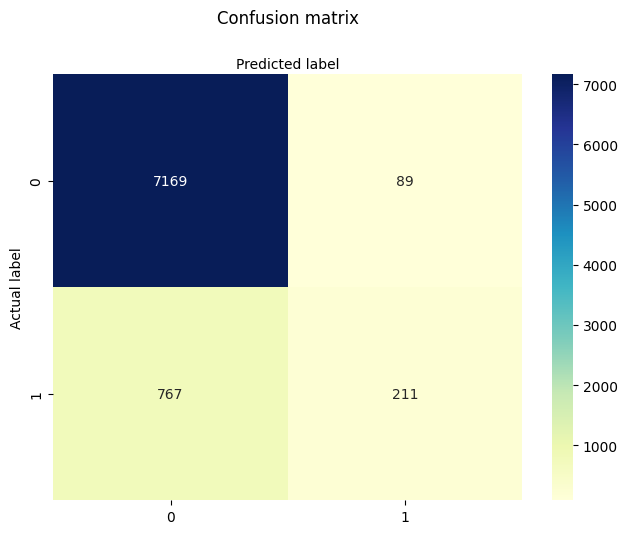

In [81]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [82]:
accuracy=(7169+211)/(7169+211+767+89)
accuracy

0.8960660514813016

In [83]:
#What proportion of positive identifications was actually correct?
precision=7169/(7169+89)
precision

0.987737668779278

In [84]:
#What proportion of actual positives was identified correctly?
recall=7169/(7169+211)
recall

0.9714092140921409